In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import pandas as pd
import ott
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from utils.utils import bucket_outcomes, prep_labels, cross_entropy, mean_cross_entropy_df, mean_cross_entropy, get_frequent_players_only

from pathlib import Path
import os
from models.naive_model import NaiveModel
from models.naivest_model import NaivestModel
from models.reg_naive_model import RegNaiveModel
from models.model_assessor import ModelAssessor
from models.pooling_model import PoolingModel

In [7]:
p_data = Path("../data/raw_pitch_data/")
train_data = pd.concat([pd.read_csv(p_data / csv_path) for csv_path in os.listdir(p_data)[5:10]])
model_assessor = ModelAssessor(train_data)

In [8]:
naivest_model_assessment = model_assessor.assess(NaivestModel, method='forward_slide_cut', n_splits = 15)
naive_model_assessment = model_assessor.assess(NaiveModel, method='forward_slide_cut', n_splits = 15)
pooling_model_assessment = model_assessor.assess(PoolingModel, method='forward_slide_cut', n_splits = 15)

/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Axes: >

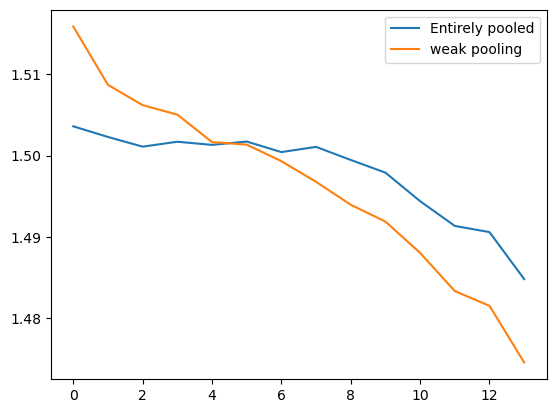

In [11]:
sns.lineplot(naivest_model_assessment, label = "Entirely pooled")
# sns.lineplot(naive_model_assessment, label = "no pooling")
sns.lineplot(pooling_model_assessment, label = "weak pooling")
# sns.lineplot(pooling_model_assessment_strong, label = "strong pooling")

In [5]:
n_weights = 8
n_splits = 5

# pitcher_batter_weights = np.linspace(0.2, 0.8, num=n_weights)

# weighted_assessments = np.zeros((n_weights, n_splits - 1))
# for i, w in enumerate(pitcher_batter_weights):
#   weighted_assessments[i] = model_assessor.assess(RegNaiveModel, method="forward_slide_forget", pitcher_batter_weight=w, n_splits=n_splits)

naive_assessment = model_assessor.assess(NaiveModel, method="forward_slide_forget", n_splits=n_splits)

/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
naive_assessment

array([3.01263916, 2.86756821, 3.29859804, 3.10307113])

<Axes: >

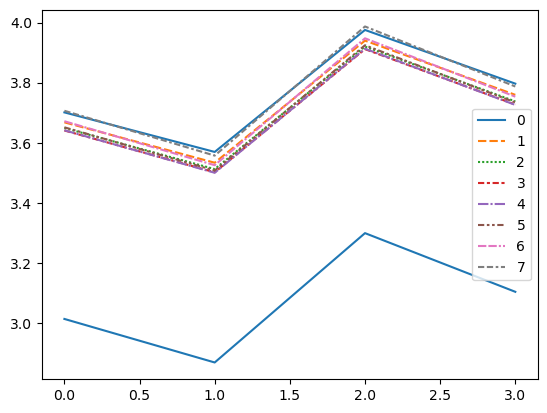

In [14]:
# sns.lineplot(weighted_assessments)
sns.lineplot(naive_assessment)
sns.lineplot(weighted_assessments.T)

<Axes: >

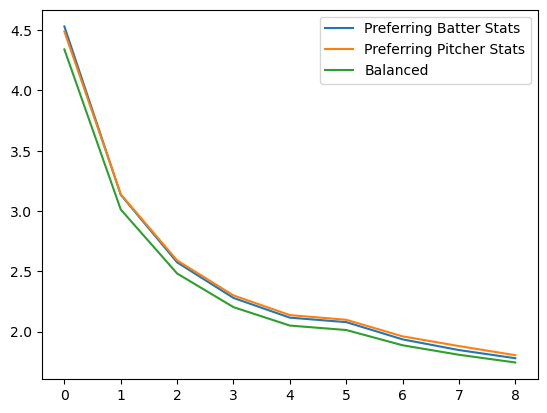

In [13]:
sns.lineplot(reg_assessment_preferbatter, label="Preferring Batter Stats")
sns.lineplot(reg_assessment_preferpitcher, label="Preferring Pitcher Stats")
sns.lineplot(naive_assessment, label="Balanced")

In [155]:
assessment = model_assessor.assess(NaiveModel, method="forward_slide")

/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/9 [00:00<?, ?it/s]

In [156]:
assessment

array([4.33985705, 3.01263916, 2.48220972, 2.20326298, 2.05056563,
       2.0136798 , 1.88717129, 1.80850662, 1.74453849])

In [122]:
split_data = np.array_split(train_data, 10)

/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [126]:
naive_model.fit(pd.concat(split_data[:9]))

In [128]:
preds = naive_model.predict_df(split_data[9])

In [132]:
labels = prep_labels(split_data[9])

In [134]:
mean_cross_entropy_df(labels, preds)

0.0

In [152]:
np.log(preds.to_numpy() + 1e-12) * labels.to_numpy()
mean_cross_entropy(labels.to_numpy(), preds.to_numpy())

array([0.18957924, 0.36610153, 0.18382729, 0.12713347, 0.28869968,
       0.35411571, 0.23508158])

In [148]:
labels.astype(float).to_numpy()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [119]:
assessment

array([3.45086137, 2.60950311, 2.33108608, 2.34817584, 2.17633454,
       1.61578683, 0.57803698, 0.        , 0.        ])

In [108]:
batter_outcomes = naive_model._make_rectangular(
    pd.concat(
        [
            ex_train_data.pitcher,
            ex_train_data.balls,
            ex_train_data.strikes,
            events_onehot,
        ],
        axis=1,
    )
    .groupby(["pitcher", "balls", "strikes"])
    .mean()
)

In [106]:
ex_train_data[ex_train_data["events"] != "unknown"]

,pitcher,batter,balls,strikes,events
59505,571735,670541,2,2,strikeout
59506,571735,670541,2,2,strikeout
59507,571735,670541,2,2,strikeout
59508,571735,670541,1,2,strikeout
59509,571735,670541,1,1,strikeout
...,...,...,...,...,...
118999,502042,621020,3,2,fielded_out
119000,502042,621020,2,2,fielded_out
119001,502042,621020,2,1,fielded_out
119002,502042,621020,2,0,fielded_out


In [63]:
batter_outcomes.to_numpy().reshape(-1, 4, 3, 7)

ValueError: cannot reshape array of size 134784 into shape (4,3,7)

In [47]:
assessment = model_assessor.assess(NaiveModel, method="forward_slide", n_splits = 4)

ValueError: cannot reshape array of size 57984 into shape (4,3,7)

In [29]:
events_onehot = pd.get_dummies(naive_model.train_data.events)
pitcher_counts = naive_model._make_rectangular(
    pd.concat(
        [
            naive_model.train_data.pitcher,
            naive_model.train_data.balls,
            naive_model.train_data.strikes,
            # events_onehot,
        ],
        axis=1,
    )
    .groupby(["pitcher", "balls", "strikes"])
    .count()
)

In [30]:
pitcher_counts

Empty DataFrame
Columns: []
Index: [(282332, 0, 0), (282332, 0, 1), (282332, 0, 2), (282332, 1, 0), (282332, 1, 1), (282332, 1, 2), (282332, 2, 0), (282332, 2, 1), (282332, 2, 2), (282332, 3, 0), (282332, 3, 1), (282332, 3, 2), (407845, 0, 0), (407845, 0, 1), (407845, 0, 2), (407845, 1, 0), (407845, 1, 1), (407845, 1, 2), (407845, 2, 0), (407845, 2, 1), (407845, 2, 2), (407845, 3, 0), (407845, 3, 1), (407845, 3, 2), (424144, 0, 0), (424144, 0, 1), (424144, 0, 2), (424144, 1, 0), (424144, 1, 1), (424144, 1, 2), (424144, 2, 0), (424144, 2, 1), (424144, 2, 2), (424144, 3, 0), (424144, 3, 1), (424144, 3, 2), (425794, 0, 0), (425794, 0, 1), (425794, 0, 2), (425794, 1, 0), (425794, 1, 1), (425794, 1, 2), (425794, 2, 0), (425794, 2, 1), (425794, 2, 2), (425794, 3, 0), (425794, 3, 1), (425794, 3, 2), (425844, 0, 0), (425844, 0, 1), (425844, 0, 2), (425844, 1, 0), (425844, 1, 1), (425844, 1, 2), (425844, 2, 0), (425844, 2, 1), (425844, 2, 2), (425844, 3, 0), (425844, 3, 1), (425844, 3, 2), (429719, 0, 0), (429719, 0, 1), (429719, 0, 2), (429719, 1, 0), (429719, 1, 1), (429719, 1, 2), (429719, 2, 0), (429719, 2, 1), (429719, 2, 2), (429719, 3, 0), (429719, 3, 1), (429719, 3, 2), (430935, 0, 0), (430935, 0, 1), (430935, 0, 2), (430935, 1, 0), (430935, 1, 1), (430935, 1, 2), (430935, 2, 0), (430935, 2, 1), (430935, 2, 2), (430935, 3, 0), (430935, 3, 1), (430935, 3, 2), (431145, 0, 0), (431145, 0, 1), (431145, 0, 2), (431145, 1, 0), (431145, 1, 1), (431145, 1, 2), (431145, 2, 0), (431145, 2, 1), (431145, 2, 2), (431145, 3, 0), (431145, 3, 1), (431145, 3, 2), (433589, 0, 0), (433589, 0, 1), (433589, 0, 2), (433589, 1, 0), ...]

[7644 rows x 0 columns]

In [23]:
mean_cross_entropy_df(test_labels, test_predictions)

1.8145264383091235

In [24]:
mean_cross_entropy_df(train_labels, train_predictions)

1.1286458770237118

In [14]:
train_predictions

,double_or_triple,fielded_out,home_run,other,single,strikeout,walk
0,0.052211,0.420762,0.056511,0.022727,0.142506,0.205774,0.099509
1,0.055556,0.388889,0.000000,0.000000,0.000000,0.388889,0.166667
2,0.055556,0.388889,0.000000,0.000000,0.000000,0.388889,0.166667
3,0.142857,0.329670,0.000000,0.038462,0.090659,0.304945,0.093407
4,0.142857,0.329670,0.000000,0.038462,0.090659,0.304945,0.093407
...,...,...,...,...,...,...,...
125164,0.026786,0.508929,0.000000,0.000000,0.080357,0.321429,0.062500
125165,0.029412,0.570588,0.044118,0.014706,0.073529,0.029412,0.238235
125166,0.026316,0.522556,0.000000,0.097744,0.026316,0.000000,0.327068
125167,0.022222,0.517460,0.011111,0.069841,0.126984,0.115873,0.136508


In [209]:
batter_outcome_tensor = naive_model.batter_outcomes.to_numpy().reshape(-1, 4, 3, 7)

In [213]:
batter_outcome_tensor[0, 1, 2]

array([0.06060606, 0.48484848, 0.        , 0.06060606, 0.18181818,
       0.15151515, 0.06060606])

In [215]:
naive_model.batter_outcomes.loc[405395, 1, 2]

double_or_triple    0.060606
fielded_out         0.484848
home_run            0.000000
other               0.060606
single              0.181818
strikeout           0.151515
walk                0.060606
Name: (405395, 1, 2), dtype: float64

In [195]:
# np.array(naive_model.batter_outcomes).reshape(-1, 4, 3, 7)
# naive_model.batter_outcomes.loc[[405395, 676606]].to_numpy().reshape(2, 4, 3, -1)
df = naive_model.batter_outcomes.loc[[405395, 676606]]
indices = pd.MultiIndex.from_product(df.index.levels, names=df.index.names)
df.reindex(indices, fill_value=0.)

double_or_triple  fielded_out  home_run     other  \
batter balls strikes                                                      
405395 0     0                0.024390     0.548780  0.024390  0.048780   
             1                0.042553     0.425532  0.042553  0.085106   
             2                0.000000     0.315789  0.000000  0.105263   
       1     0                0.000000     0.718750  0.000000  0.000000   
             1                0.030303     0.575758  0.060606  0.030303   
...                                ...          ...       ...       ...   
676606 2     1                0.000000     1.000000  0.000000  0.000000   
             2                0.000000     0.000000  0.000000  0.000000   
       3     0                0.000000     0.000000  0.000000  0.000000   
             1                0.000000     0.000000  0.000000  0.000000   
             2                0.000000     0.000000  0.000000  0.000000   

                        single  strikeout      walk  
batter balls strikes                                 
405395 0     0        0.170732   0.097561  0.085366  
             1        0.212766   0.127660  0.063830  
             2        0.157895   0.368421  0.052632  
       1     0        0.093750   0.062500  0.125000  
             1        0.151515   0.090909  0.060606  
...                        ...        ...       ...  
676606 2     1        0.000000   0.000000  0.000000  
             2        0.000000   0.000000  0.000000  
       3     0        0.000000   0.000000  0.000000  
             1        0.000000   0.000000  0.000000  
             2        0.000000   0.000000  0.000000  

[7308 rows x 7 columns]

In [138]:
(-test_labels * np.log(test_predictions + 1e-12)).sum().sum()

11495.898458120144

In [105]:
naive_model._preprocess_test(test_data.loc[1:1])

,pitcher,batter,balls,strikes
1,543339,488726,3,2


In [84]:
def cross_entropy_df(labels: pd.DataFrame, predictions: pd.DataFrame):
    n = len(labels.loc[0])
    merged = pd.concat([labels, predictions])
    return merged.apply(lambda row: cross_entropy(row[:n], row[n:]), axis=1)

In [111]:
cross_entropy_df(test_predictions, test_labels)

0      -0.0
1      -0.0
2      -0.0
3      -0.0
4      -0.0
       ... 
7511   -0.0
7512   -0.0
7513   -0.0
7514   -0.0
7515   -0.0
Length: 15032, dtype: float64

In [65]:
test_predictions

,home_run,single,strikeout,unknown,walk
0,0.000000,0.139398,0.199193,0.325385,0.336023
1,0.000000,0.139398,0.199193,0.325385,0.336023
2,0.021739,0.117754,0.286232,0.423188,0.151087
3,0.010870,0.164493,0.131884,0.533333,0.159420
4,0.004630,0.121795,0.218305,0.575142,0.080128
...,...,...,...,...,...
7511,0.027382,0.156098,0.235723,0.408215,0.172582
7512,0.020400,0.122399,0.128519,0.483884,0.244798
7513,0.037327,0.158422,0.201475,0.464022,0.138754
7514,0.036858,0.164566,0.222782,0.509337,0.066457


In [54]:
predictions

,double_or_triple,fielded_out,home_run,other,single,strikeout,walk
0,0.010638,0.314747,0.000000,0.000000,0.139398,0.199193,0.336023
1,0.010638,0.314747,0.000000,0.000000,0.139398,0.199193,0.336023
2,0.049638,0.373551,0.021739,0.000000,0.117754,0.286232,0.151087
3,0.021739,0.500725,0.010870,0.010870,0.164493,0.131884,0.159420
4,0.070513,0.500000,0.004630,0.004630,0.121795,0.218305,0.080128
...,...,...,...,...,...,...,...
7511,0.046568,0.353450,0.027382,0.008197,0.156098,0.235723,0.172582
7512,0.029172,0.454712,0.020400,0.000000,0.122399,0.128519,0.244798
7513,0.036637,0.414943,0.037327,0.012442,0.158422,0.201475,0.138754
7514,0.057680,0.435901,0.036858,0.015756,0.164566,0.222782,0.066457


In [34]:
naive_model.batter_outcomes.groupby(["balls", "strikes"]).mean()

double_or_triple  fielded_out  home_run     other    single  \
balls strikes                                                                
0     0                0.034739     0.392966  0.022263  0.031873  0.111277   
      1                0.032773     0.360141  0.018444  0.024180  0.108543   
      2                0.025621     0.269172  0.014931  0.014572  0.082710   
1     0                0.040415     0.406099  0.025971  0.023492  0.117161   
      1                0.035033     0.376234  0.020454  0.019625  0.115332   
      2                0.026631     0.289366  0.016267  0.013838  0.086757   
2     0                0.041055     0.367522  0.029572  0.012478  0.107625   
      1                0.038876     0.367553  0.023090  0.012071  0.110269   
      2                0.031100     0.296257  0.018413  0.011728  0.088690   
3     0                0.028061     0.209518  0.020125  0.006690  0.063132   
      1                0.032114     0.277795  0.022514  0.006914  0.082457   
      2                0.029332     0.248843  0.019644  0.009721  0.079731   

               strikeout      walk  
balls strikes                       
0     0         0.331452  0.075430  
      1         0.403951  0.051968  
      2         0.559787  0.033207  
1     0         0.252746  0.134117  
      1         0.349149  0.084173  
      2         0.508918  0.058224  
2     0         0.177232  0.264516  
      1         0.273120  0.175022  
      2         0.437367  0.116445  
3     0         0.099339  0.573136  
      1         0.162682  0.415524  
      2         0.298897  0.313833

In [25]:
ex_data[[*ex_data.columns[:10], 'balls', 'strikes', 'description', 'pitch_number', 'inning']]

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,balls,strikes,description,pitch_number,inning
0,2949,FF,2019-07-05,94.0,2.95,5.11,"Quijada, José",435263,650671,single,0,0,hit_into_play,1,9
1,3071,FF,2019-07-05,93.6,3.04,5.07,"Quijada, José",455976,650671,field_out,3,2,hit_into_play,8,9
2,3134,FF,2019-07-05,94.5,3.02,5.07,"Quijada, José",455976,650671,NaN,3,2,foul,7,9
3,3256,FF,2019-07-05,94.1,3.10,5.12,"Quijada, José",455976,650671,NaN,2,2,ball,6,9
4,3401,FF,2019-07-05,94.6,2.85,5.12,"Quijada, José",455976,650671,NaN,2,2,foul,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125358,3980,FF,2019-08-06,89.0,-2.73,4.98,"Leake, Mike",656555,502190,NaN,0,1,ball,2,1
125359,4167,FF,2019-08-06,88.9,-2.63,4.96,"Leake, Mike",656555,502190,NaN,0,0,foul,1,1
125360,4270,FC,2019-08-06,87.3,-3.03,4.96,"Leake, Mike",572816,502190,home_run,1,1,hit_into_play,3,1
125361,4386,FF,2019-08-06,88.1,-3.16,4.88,"Leake, Mike",572816,502190,NaN,0,1,ball,2,1
